In [843]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#Importing the dataset
data = pd.read_csv("hourlywagedata.csv")
data.head(10)

,position,agerange,yrsscale,hourwage
0,1,1,2,13.736234054538
1,0,1,2,16.4407309689108
2,0,1,3,21.3891077239505
3,1,1,1,11.377187468408
4,0,1,3,21.5607775454338
5,0,1,1,18.1174858901292
6,1,1,3,13.1400498995424
7,0,1,1,24.7253574648846
8,0,1,2,15.7033859876378
9,1,1,1,18.9398303592689


## Cleaning Dataset

In [844]:
data.dtypes

position     int64
agerange     int64
yrsscale     int64
hourwage    object
dtype: object

In [845]:
data.shape

(3000, 4)

#### Checking if any missing data is of the form NaN

In [846]:
missingvaluecount = data.isna().sum()
missingvaluecount

position    0
agerange    0
yrsscale    0
hourwage    0
dtype: int64

#### Checking all unique entries in each column to determine which columns the missing data is in

In [847]:
data['position'].unique()
data['agerange'].unique()
data['yrsscale'].unique()
data['hourwage'].unique()

array(['13.736234054538', '16.4407309689108', '21.3891077239505', ...,
       '18.4502340056492', '19.1444598024073', '13.638465988071'],
      dtype=object)

#### Searching the entire data set for empty string values

In [848]:
data[data.eq(" ").any(1)]

,position,agerange,yrsscale,hourwage
21,1,1,3,
52,0,1,1,
108,1,1,2,
117,1,1,2,
151,0,1,2,
...,...,...,...,...
2793,1,3,4,
2867,0,3,5,
2946,1,3,5,
2947,0,3,3,


There are 89 rows of data in the 'hourwage' column where there is no data entry. 

#### Removing all rows where there are empty strings

In [849]:
df = data.loc[~(data['hourwage'] == " ")]
df.shape

(2911, 4)

#### Converting datatype of the 'hourwage' column to float

In [850]:
df = df.astype({'hourwage': float})
df.dtypes

position      int64
agerange      int64
yrsscale      int64
hourwage    float64
dtype: object

## Plots

Generate three plots showing the average hourly wage against the three
categorical independent variables

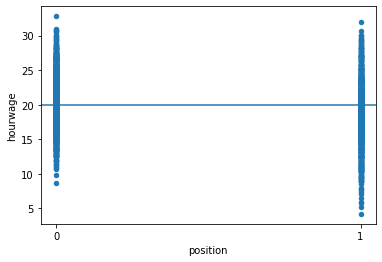

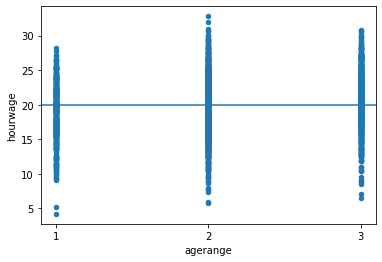

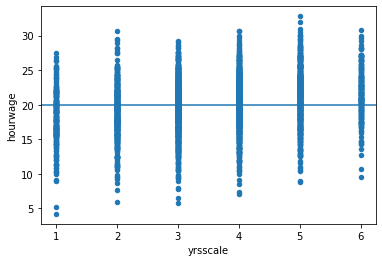

In [851]:
df.plot.scatter(x='position', y='hourwage', xticks=[0,1])
plt.axhline(y=np.nanmean(df.hourwage))
df.plot.scatter(x='agerange', y='hourwage', xticks=[1,2,3])
plt.axhline(y=np.nanmean(df.hourwage))
df.plot.scatter(x='yrsscale', y='hourwage')
plt.axhline(y=np.nanmean(df.hourwage))

#### Postion 
* Employee who work in hospitals have an small range in their payscale and typically can earn more those who work in the office whether their pay is below or above the average hourly wage.
#### Age Range
* Employees in the age range 18-30 appear to potentially earn the least, however these appear to be outliers for this particular group and it is employees in the age range between 31-45 who typically can earn the lowest hourly wage. However, those is age group can also be the highest earns and thus this group has the greatest variance in their hourly salary.
#### Yrs Scale
* In general, the longer an employee has been with the company the higher the lowest hourly salary employees earn increases. This is also the case on the top end of employees hourly salary however the increase in pay is smaller as the years increase.

## Multiple Linear Regression

### Identify the IV's and DV

In [852]:
X = df.iloc[:,[0,1,2]].values
y = df.iloc[:,[3]].values

In [853]:
X=X.reshape(-1, 3)
y=y.reshape(-1, 1)

### Training and Test Samples

In [854]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, shuffle=True)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (2328, 3) (2328, 1)
Test data: (583, 3) (583, 1)


### Checking distribution of the training and test samples

In [855]:
X_train_df = pd.DataFrame(X_train)
X_train_df

,0,1,2
0,0,3,3
1,1,3,6
2,1,2,4
3,0,2,1
4,0,2,3
...,...,...,...
2323,0,2,3
2324,0,3,4
2325,1,2,3
2326,0,3,3


In [856]:
X_test_df = pd.DataFrame(X_test)
X_test_df

,0,1,2
0,1,1,1
1,1,3,5
2,0,2,4
3,0,2,4
4,0,1,1
...,...,...,...
578,0,2,4
579,0,2,3
580,0,2,5
581,0,2,2


Text(0.5, 1.0, "Distribution of 'Postion' variables Training and Test Set values")

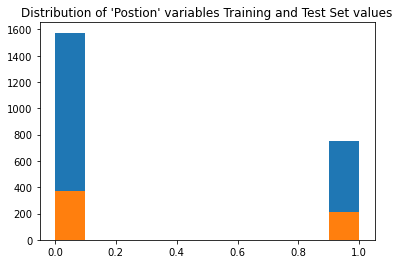

In [857]:
plt.hist(X_train_df[0])
plt.hist(X_test_df[0])
plt.title("Distribution of 'Postion' variables Training and Test Set values")

Text(0.5, 1.0, "Distribution of 'Age Range' variables Training and Test Set values")

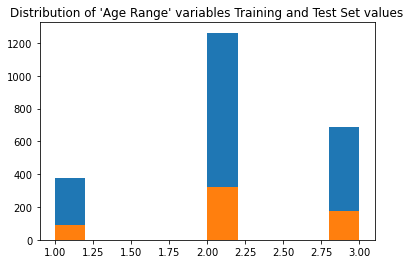

In [858]:
plt.hist(X_train_df[1])
plt.hist(X_test_df[1])
plt.title("Distribution of 'Age Range' variables Training and Test Set values")

Text(0.5, 1.0, "Distribution of 'Yrs Scale' variables Training and Test Set values")

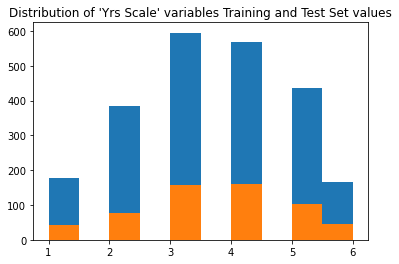

In [859]:
plt.hist(X_train_df[2])
plt.hist(X_test_df[2])
plt.title("Distribution of 'Yrs Scale' variables Training and Test Set values")

The distribution of the training and test appear to be proportionate for each IV's categorical variables, and thus the distribution does not need to be adjusted using standarisation and just normalisation. 

## Applying Scalers to the training and test sample sets

As the proportions of the catgeoricals variables for the training and test sets are representative of each other, the MinMaxScaler will be used to normalise all values in each column. 

In [871]:
# importing scaling modules
from sklearn.preprocessing import MinMaxScaler

### MinMaxScaler

In [861]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
minmax_df_new = pd.DataFrame(df, columns = ['position', 'agerange', 'yrsscale' ])
minmax_df_new

,position,agerange,yrsscale
0,1,1,2
1,0,1,2
2,0,1,3
3,1,1,1
4,0,1,3
...,...,...,...
2995,0,3,4
2996,0,3,4
2997,1,3,4
2998,0,3,4


In [862]:
X_test = scaler.transform(X_test)
X_test_minmax_new = pd.DataFrame(X_test, columns = ['position', 'agerange', 'yrsscale' ])
X_test_minmax_new

,position,agerange,yrsscale
0,1.0,0.0,0.0
1,1.0,1.0,0.8
2,0.0,0.5,0.6
3,0.0,0.5,0.6
4,0.0,0.0,0.0
...,...,...,...
578,0.0,0.5,0.6
579,0.0,0.5,0.4
580,0.0,0.5,0.8
581,0.0,0.5,0.2


### Creating Multiple Linear Regression Model

In [863]:
# create an empty linear regression model like below and give it a good variable name
hr_wages_model = LinearRegression()

# to create the model, we use fit(X,y)
model = hr_wages_model.fit(X_train,y_train)

### Prediction for Test Set

In [864]:
pred = hr_wages_model.predict(X_test)

In [865]:
pred[0:5]

array([[16.93690512],
       [19.76484985],
       [21.07258932],
       [21.07258932],
       [18.874165  ]])

### Error Bar

(583, 1)

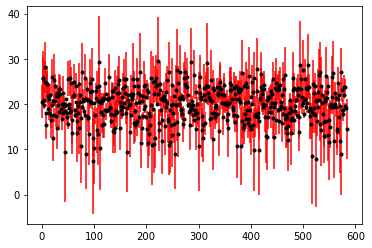

In [866]:
plt.errorbar(range(1,584), y_test.squeeze(), yerr=abs(y_test-pred).squeeze(), fmt='.k', ecolor="red");

y_test.shape

In [867]:
print ("Score:", model.score(X_test, y_test))

Score: 0.14130779857329123


Error Score (R^2): 0.14 
* This values indicates that our model is not an apporitate estimator with the selected variables as only 14% of the hourly wages can be predicted accurately with the model created.

In [868]:
from sklearn.metrics import mean_squared_error

In [873]:
rmse = mean_squared_error(y_test, pred, squared = False)
rmse

3.7801131230070673

In [877]:
print(y_test.min())
print(y_test.max())

7.42376202028865
29.5659104549994


RMSE: 3.78
* As both the RMSE and R^2 values are low, this suggests that as the y_test values are within a constrained range of 7 - 29 they are easy to predict without the model. Thus, the model is not an apporiate method to predict an employees hourly wage. 

### Modelled linear equation for dependent variable prediction

In [870]:
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [18.874165]
Coefficients: 
 [[-1.93725988 -0.3098631   3.92225979]]


**hourwages** = 18.87 - 1.94(Position) - 0.31(Age Range) + 3.92(Yrs Scale)

* Postion has a strong negative impact on an employees hourly wages, this might mean that those who work in the office their salaries are lower in comparison to those who work in the hospitals who's salaries are higher. Which would be seen in the 3 plots where the average salary was compared to the categorical variables.
* Age Range also has a negative impact but much smaller than that of an employees Position. This figure suggest that as the age range increases an employees hourly salaries may decrease but only by a small amount. 
* Yrs Scale appears to have a strong postive impact on an employees salary according to the model in which it suggests that as an employees years at with the company increases so does their salary.

Based on this model, it could be recommended to only consider the amount of years an employees has been employed at the company as a way to reflect increases in their hourly pay. 